## Libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


## Importing data

In [16]:
# add the encoding to read correctly file (supporta lettere accentate)
df = pd.read_csv('top10s.csv', encoding='latin1')
df.head()


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [17]:
df.drop(columns=df.columns[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [20]:
df.duplicated().sum()

0

The dataset is built properly: no missing values and no duplicates.

## Features
- Title
- Artist: Name of the Artist.
- song: Name of the Track.
- year
- bpm: Beats.Per.Minute - The tempo of the song.
- nrgy: The energy of a song - the higher the value, the more energtic. 
- Danceability - The higher the value, the easier it is to dance to this song.
- Loudness..dB.. - The higher the value, the louder the song
- Liveness - The higher the value, the more likely the song is a live recording
- Valence - The higher the value, the more positive mood for the song.
- dur: Length - The duration of the song. ms?
- Acousticness.. - The higher the value the more acoustic the song is.
- Speechiness - The higher the value the more spoken word the song contains.
- Popularity- The higher the value the more popular the song is.

The dataset contains 603 songs but only 184 artists: we have hit-makers here.

In [23]:
len(df['artist'].unique())

184

Who was more popular in 2010-2019?

Not only California Girls loved Katy at the time. (Was the trip in the space that changed everything?)

In [24]:
df['artist'].value_counts()

artist
Katy Perry             17
Justin Bieber          16
Rihanna                15
Maroon 5               15
Lady Gaga              14
                       ..
Iggy Azalea             1
5 Seconds of Summer     1
Michael Jackson         1
Disclosure              1
Daddy Yankee            1
Name: count, Length: 184, dtype: int64

In [70]:
Popularity=pd.DataFrame(df['artist'].value_counts())
Popularity.columns = ['count']
Popularity['year']=df.groupby('artist')['year'].median().astype(int)
Popularity['duration']=df.groupby('artist')['dur'].mean()
Popularity['duration']=round(Popularity['duration'],2)
Popularity=Popularity.head(30)

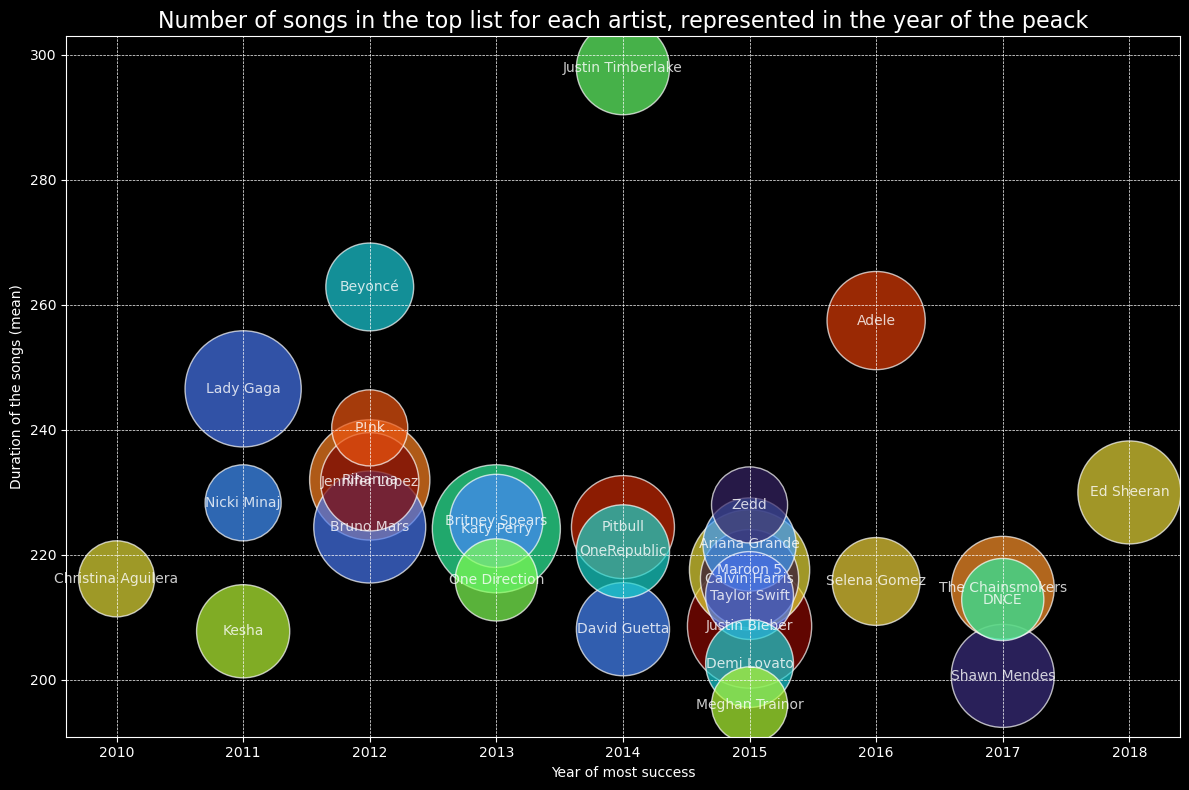

In [92]:
chosen_cmap = 'turbo'  

# Posizioni e dimensioni
np.random.seed(42)
x = Popularity['year']
y = Popularity['duration']
sizes = Popularity['count'] * 500
colors = np.random.rand(Popularity.shape[0])

# Imposta stile nero
plt.style.use('dark_background')

# Crea il plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x, y,
    s=sizes,
    c=colors,
    cmap=chosen_cmap,
    alpha=0.7,
    edgecolors='white'
)

# Etichette artista
for i, artist in enumerate(Popularity.index):
    plt.text(
        x.iloc[i], y.iloc[i],
        artist,
        ha='center',
        va='center',
        fontsize=10,
        color='white',
        alpha=0.8
    )

# Aggiungi griglia bianca
plt.grid(True, color='white', linestyle='--', linewidth=0.5)

# Titolo e assi
plt.title('Number of songs in the top list for each artist, represented in the year of the peack', fontsize=16, color='white')
plt.xlabel('Year of most success', color='white')
plt.ylabel('Duration of the songs (mean)', color='white')

# Imposta colore degli assi
plt.tick_params(colors='white')

# Mostra plot
plt.tight_layout()
plt.show()


year 2015 (or around it) the music market varied. 

All the songs have a similar duration, except for Justin Timbarlake production


What about the genre?
Pop music ate the others alive

In [81]:
df['top genre'].value_counts()

top genre
dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2


C:\Users\carlo\AppData\Local\Temp\ipykernel_9664\359980133.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('turbo')  # choose any: viridis, turbo, magma, etc.


Text(0.5, 1.0, 'Most cool 10 music genre')

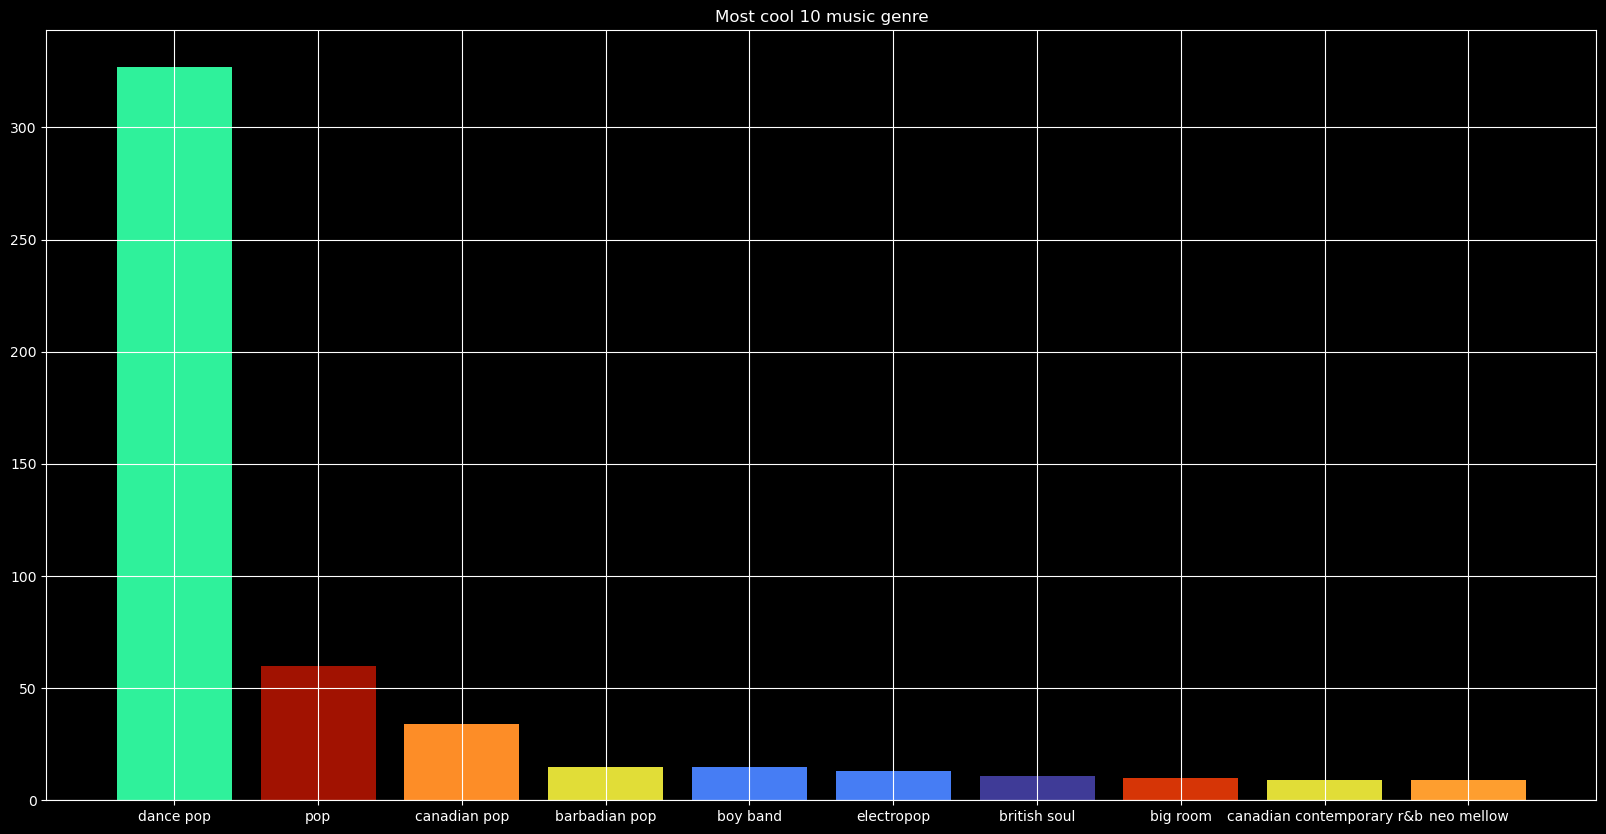

In [91]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.grid('white')

np.random.seed(42)  # for reproducibility
random_values = np.random.rand(10)  # one per genre
colormap = cm.get_cmap('turbo')  # choose any: viridis, turbo, magma, etc.
colors = colormap(random_values)

plt.bar(df['top genre'].value_counts().head(10).index, df['top genre'].value_counts().head(10).values, color=colors)
plt.title('Most cool 10 music genre')


Did the artist succeeded in only a genre or more?
Most of them, yes

C:\Users\carlo\AppData\Local\Temp\ipykernel_9664\78391750.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('turbo')  # choose any: viridis, turbo, magma, etc.


Text(0.5, 1.0, 'Distribution of the Genre explored by the artist in hot hits')

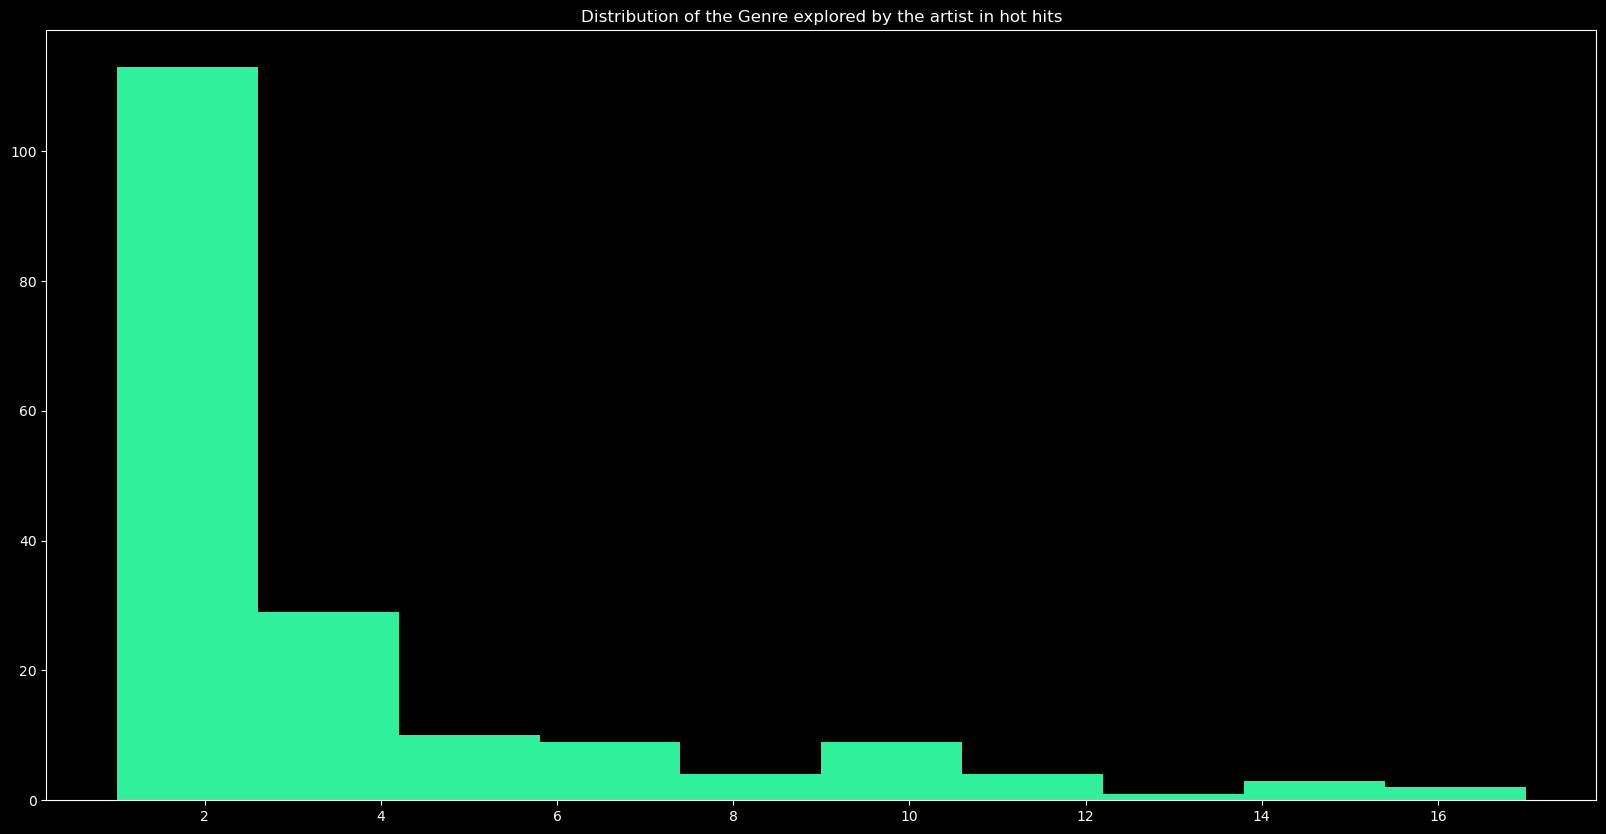

In [107]:
plt.figure(figsize=(20,10))
np.random.seed(42)  # for reproducibility
random_values = np.random.rand(1)  # one per genre
colormap = cm.get_cmap('turbo')  # choose any: viridis, turbo, magma, etc.
colors = colormap(random_values)
plt.hist(df.groupby('artist')['top genre'].value_counts(), color=colors)
plt.title('Distribution of the Genre explored by the artist in hot hits')

## Analysis of the characteristic of a popular song

## Sum of popularity